<a href="https://colab.research.google.com/github/GVAmit/ML-notes/blob/main/Simple%20Imputation%20Mean%20and%20Median.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn. impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv('titanic_toy.csv')

In [6]:
df.sample(5)


,Age,Fare,Family,Survived
360,40.0,27.9000,5,0
502,NaN,7.6292,0,0
772,57.0,10.5000,0,0
334,NaN,133.6500,1,1
214,NaN,7.7500,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [8]:
df.isnull().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [10]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [13]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [14]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [15]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
202,34.0,6.4958,0,34.0,34.000000,6.4958,6.4958
2,26.0,7.9250,0,26.0,26.000000,7.9250,7.9250
866,27.0,13.8583,1,27.0,27.000000,13.8583,13.8583
826,NaN,56.4958,0,28.0,29.498846,56.4958,56.4958
637,31.0,26.2500,2,31.0,31.000000,26.2500,26.2500


In [16]:
print('Original Age variable variance : ', X_train['Age'].var())
print('Age imputed with median variance : ', X_train['Age_median'].var())
print('Age imputed with mean variance : ', X_train['Age_mean'].var())

print('Original Fare variable variance : ', X_train['Fare'].var())
print('Fare imputed with median variance : ', X_train['Fare_median'].var())
print('Fare imputed with mean variance : ', X_train['Fare_mean'].var())

Original Age variable variance :  210.2517072477438
Age imputed with median variance :  169.20731007048096
Age imputed with mean variance :  168.8519336687225
Original Fare variable variance :  2761.031434948639
Fare imputed with median variance :  2637.01248167777
Fare imputed with mean variance :  2621.2323749512393


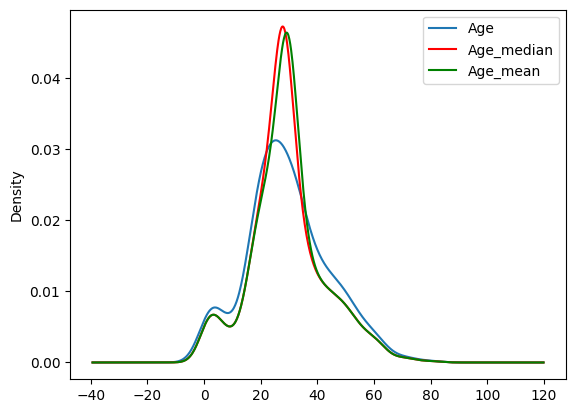

In [17]:
from os import linesep
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde',ax=ax)

X_train['Age_median'].plot(kind='kde',ax = ax,color = 'red')

X_train['Age_mean'].plot(kind='kde',ax=ax,color = 'green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<Axes: ylabel='Density'>

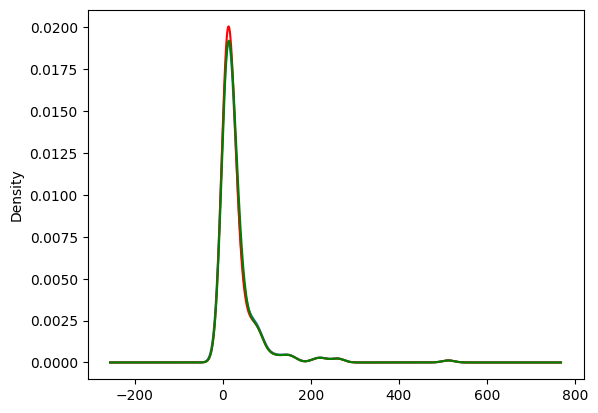

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde',ax=ax)

X_train['Fare_median'].plot(kind='kde',ax = ax,color = 'red')

X_train['Fare_mean'].plot(kind='kde',ax=ax,color = 'green')

In [19]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,70.082085,71.193767
Fare,75.481375,2761.031435,18.599163,63.938058,60.224654,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.587710,-5.616299,17.672035,17.657433
Age_median,210.251707,63.938058,-5.587710,169.207310,168.851934,59.728510,60.700688
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,56.282518,57.175304
Fare_median,70.082085,2761.031435,17.672035,59.728510,56.282518,2637.012482,2621.232375
Fare_mean,71.193767,2761.031435,17.657433,60.700688,57.175304,2621.232375,2621.232375


In [20]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.087232,0.088944
Fare,0.091482,1.000000,0.207193,0.093496,0.088151,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.255307,-0.256883,0.204536,0.204981
Age_median,1.000000,0.093496,-0.255307,1.000000,0.998949,0.089416,0.091145
Age_mean,1.000000,0.088151,-0.256883,0.998949,1.000000,0.084346,0.085941
Fare_median,0.087232,1.000000,0.204536,0.089416,0.084346,1.000000,0.997003
Fare_mean,0.088944,1.000000,0.204981,0.091145,0.085941,0.997003,1.000000


<Axes: >

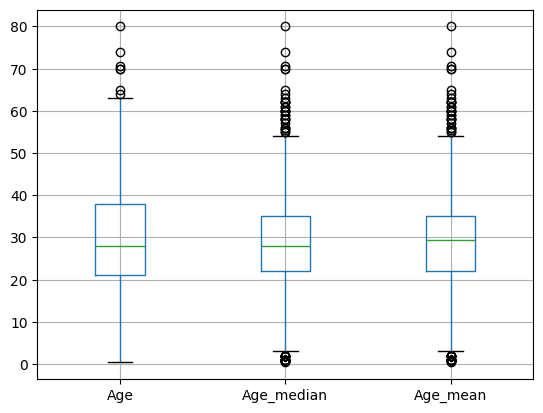

In [21]:
X_train[['Age','Age_median', 'Age_mean']].boxplot()

<Axes: >

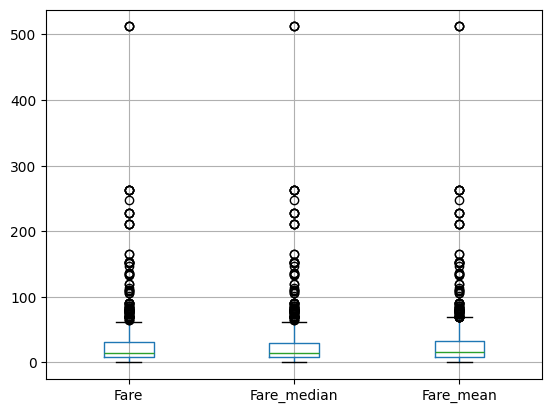

In [22]:
X_train[['Fare','Fare_median', 'Fare_mean']].boxplot()

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [23]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [25]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare']),
],remainder='passthrough')

In [26]:
trf.fit(X_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [27]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [28]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [29]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [30]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])